# 🔌 Problem 1: Equivalent Resistance Using Graph Theory

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px;">
<h2 style="color: #2E86C1; text-align: center;">📐 Visualizing Circuit Simplification Step-by-Step</h2>
</div>

---

## 🎯 Motivation

Calculating equivalent resistance is a fundamental task in circuit analysis. While series and parallel rules work well for simple circuits, **graph theory** provides a powerful, automated way to analyze **complex resistor networks**.

A circuit is modeled as a graph:
- **Nodes** represent junctions
- **Edges** represent resistors (with weights equal to resistance)

---

## 🧠 Approach

We reduce the graph step by step using:

1. 🔗 **Series Reduction**  
   Two resistors in a chain become one with total resistance:  
   $$ R_{\text{eq}} = R_1 + R_2 $$

2. 🔁 **Parallel Reduction**  
   Two or more resistors between the same nodes:  
   $$ \frac{1}{R_{\text{eq}}} = \frac{1}{R_1} + \frac{1}{R_2} + \cdots $$

3. 🔄 Repeat until the entire network reduces to a single equivalent resistance.

---

## 🧮 Example Circuit

A simple 4-node graph with resistors:

- 2Ω between nodes (1)-(2)  
- 3Ω between nodes (2)-(3)  
- 4Ω between nodes (3)-(4)  
- 1Ω directly between nodes (1)-(4)

---

## ⚙️ Algorithm Pseudocode

```plaintext
while graph not reduced:
    if a node has exactly 2 neighbors:
        combine series resistors
    if parallel resistors exist:
        combine using reciprocal rule


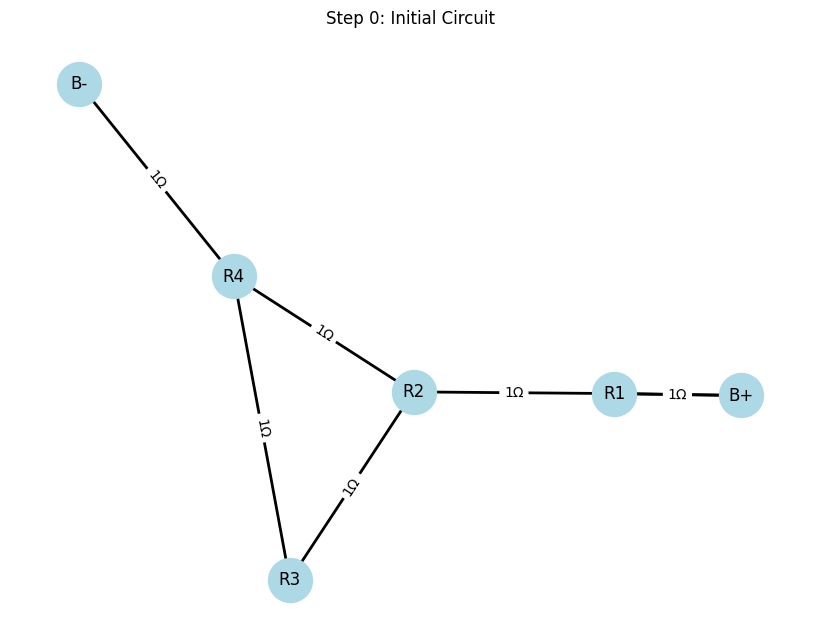

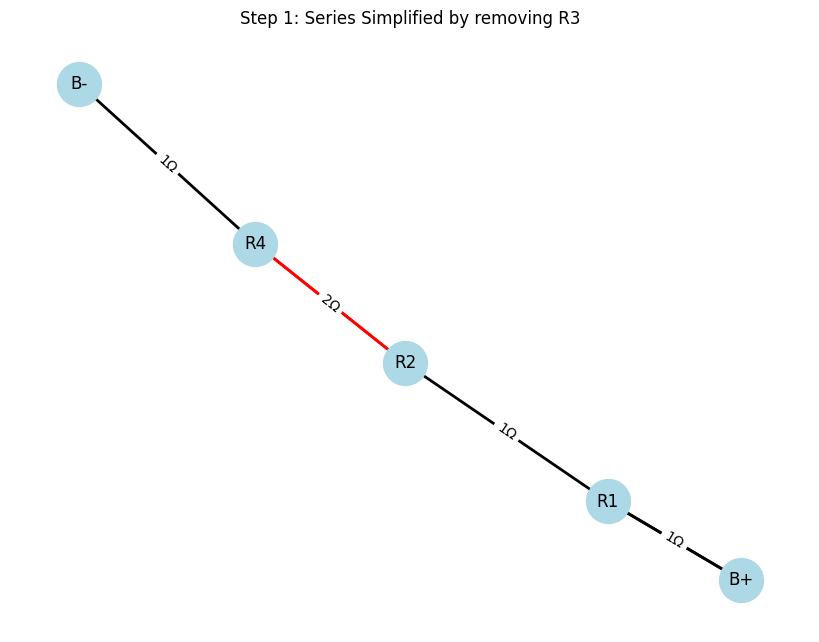

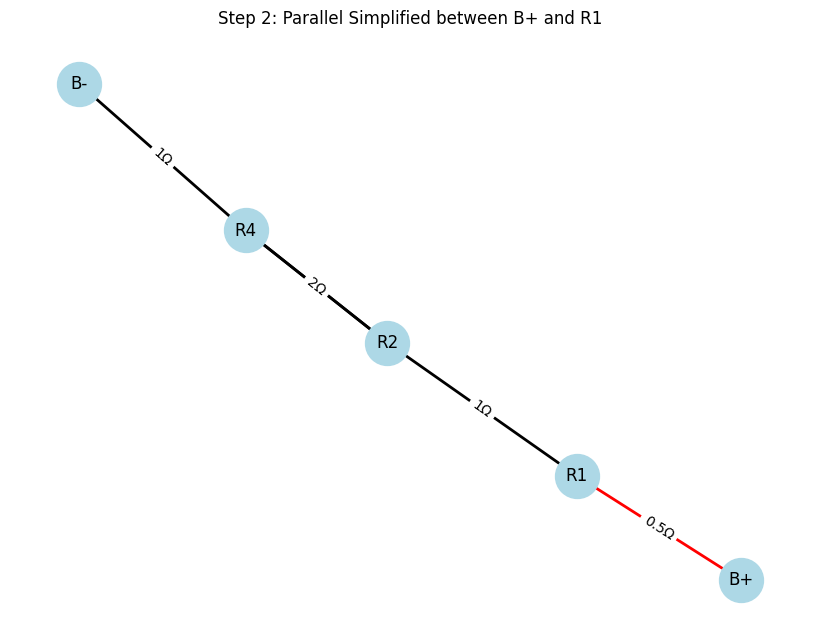

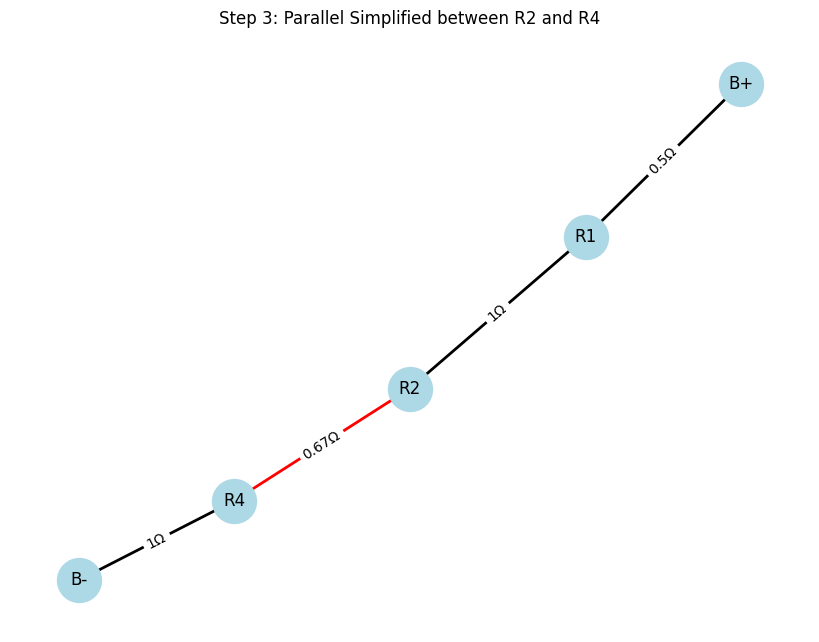

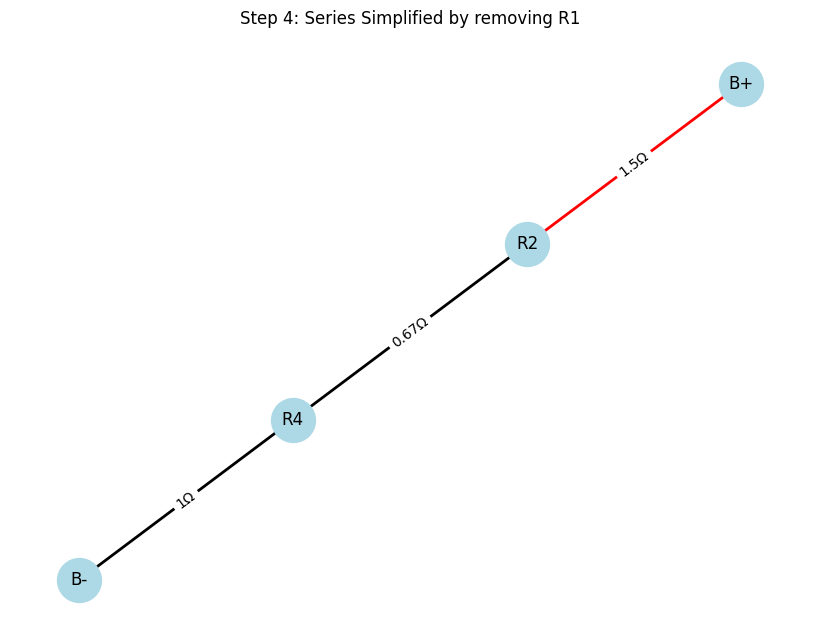

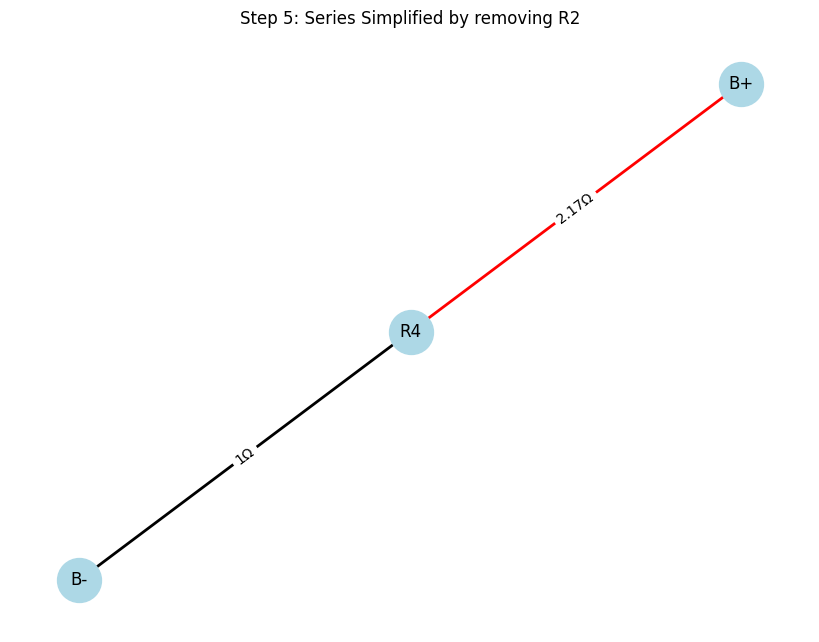

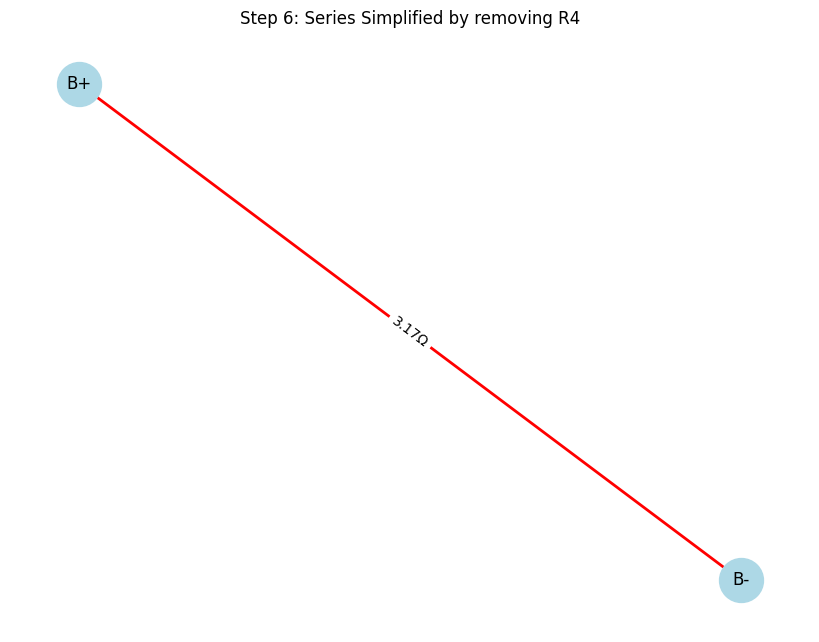

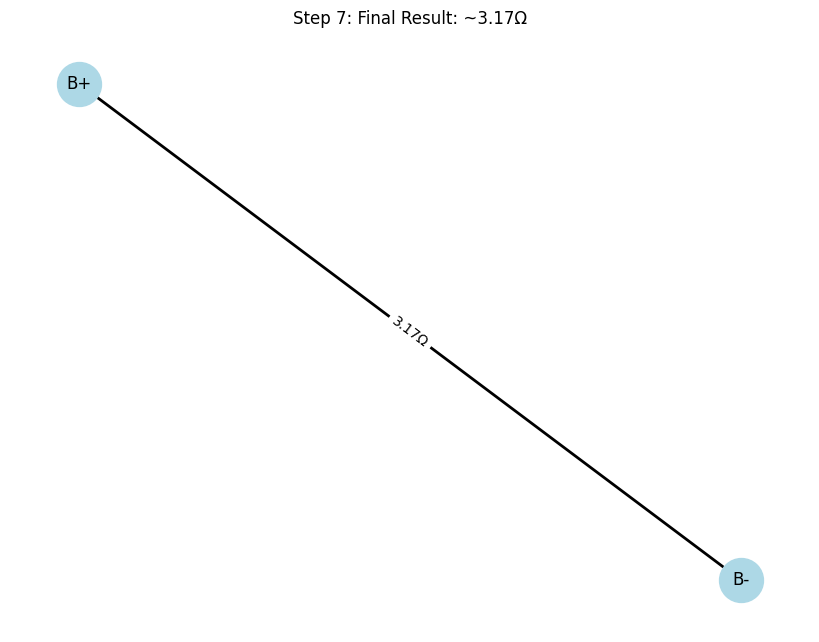

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a MultiGraph to allow parallel edges
G = nx.MultiGraph()

# Initial circuit setup with 1Ω resistors
G.add_edge("B+", "R1", resistance=1)
G.add_edge("R1", "R2", resistance=1)
G.add_edge("R2", "R3", resistance=1)
G.add_edge("R3", "R4", resistance=1)
G.add_edge("R4", "B-", resistance=1)
G.add_edge("B+", "R1", resistance=1)  # Parallel edge
G.add_edge("R2", "R4", resistance=1)  # Parallel edge

step_counter = 0

# Draw the graph with optional highlight on simplified edge(s)
def draw_graph(G, step_desc, highlight_edges=None):
    global step_counter
    pos = nx.spring_layout(G, seed=42)
    edge_labels = {(u, v): f'{round(d["resistance"], 2)}Ω' for u, v, d in G.edges(data=True)}
    colors = []

    for u, v in G.edges():
        if highlight_edges is not None and ((u, v) in highlight_edges or (v, u) in highlight_edges):
            colors.append("red")
        else:
            colors.append("black")

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, edge_color=colors, width=2)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f"Step {step_counter}: {step_desc}")
    plt.show()
    step_counter += 1

# Show initial circuit
draw_graph(G, "Initial Circuit")

# Series reduction
def reduce_series(G):
    changed = True
    while changed:
        changed = False
        for node in list(G.nodes()):
            if node in ("B+", "B-") or G.degree(node) != 2:
                continue
            neighbors = list(G.neighbors(node))
            if len(neighbors) != 2:
                continue
            u, v = neighbors
            r1 = sum(d["resistance"] for _, d in G[u][node].items())
            r2 = sum(d["resistance"] for _, d in G[node][v].items())
            total_r = r1 + r2
            G.remove_node(node)
            G.add_edge(u, v, resistance=total_r)
            draw_graph(G, f"Series Simplified by removing {node}", highlight_edges=[(u, v)])
            changed = True
            break

# Parallel reduction
def reduce_parallel(G):
    changed = True
    while changed:
        changed = False
        for u, v in list(G.edges()):
            edges = list(G.get_edge_data(u, v).items())
            if len(edges) <= 1:
                continue
            resistances = [d["resistance"] for _, d in edges]
            R_eq = round(1 / sum(1/r for r in resistances), 2)
            for key, _ in edges:
                G.remove_edge(u, v, key=key)
            G.add_edge(u, v, resistance=R_eq)
            draw_graph(G, f"Parallel Simplified between {u} and {v}", highlight_edges=[(u, v)])
            changed = True
            break

# Apply the simplification steps
reduce_series(G)
reduce_parallel(G)
reduce_series(G)
reduce_parallel(G)

# Final resistance calculation
def calc_total_resistance(G, start, end):
    try:
        return round(nx.shortest_path_length(G, source=start, target=end, weight="resistance"), 2)
    except:
        return float("inf")

total_r = calc_total_resistance(G, "B+", "B-")
draw_graph(G, f"Final Result: ~{total_r}Ω")


### 🔗 Falstad Simulation Link

You can view the circuit in the Falstad Circuit Simulator here:

[Open in Falstad](https://tinyurl.com/22q6m5yy)


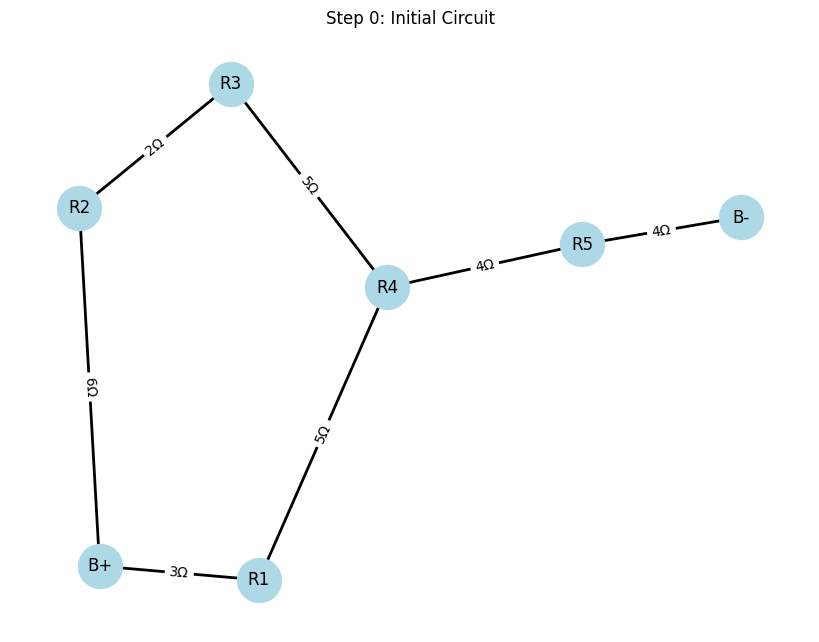

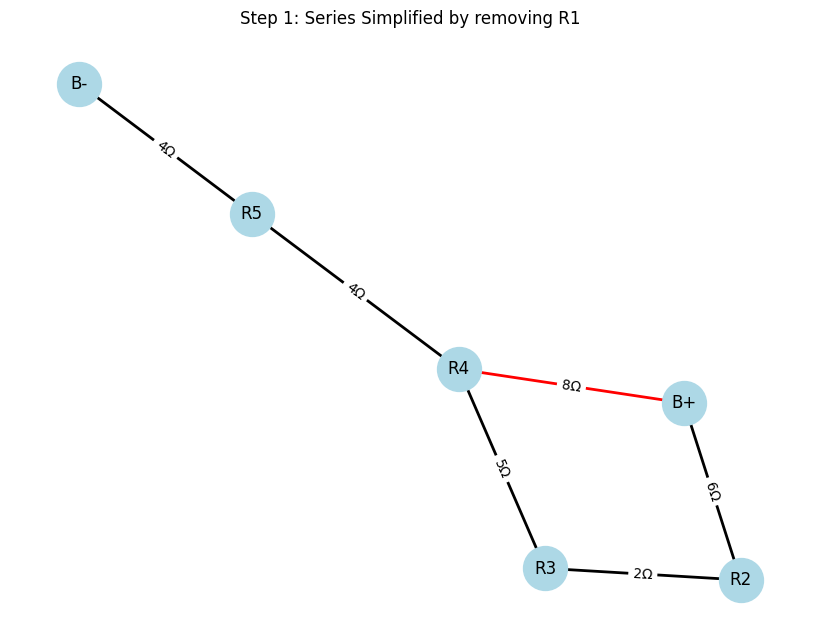

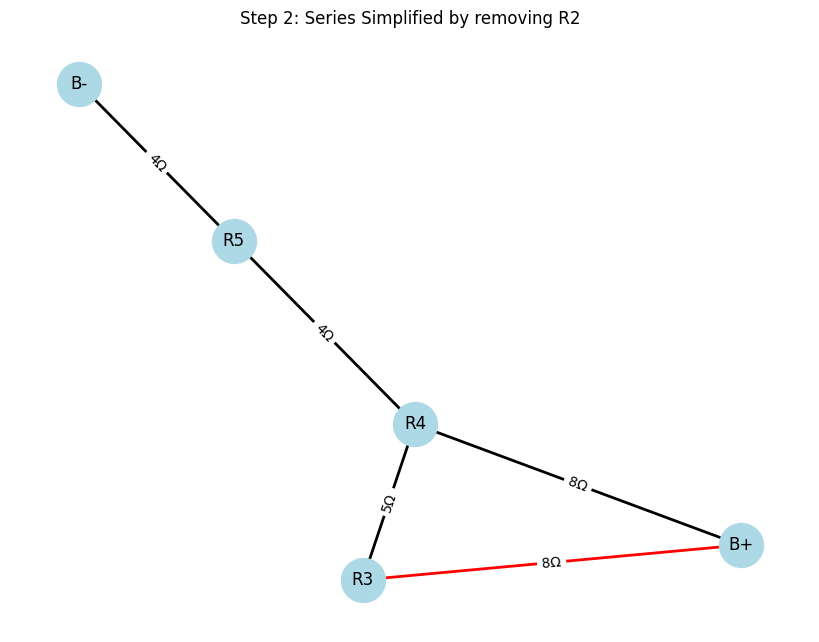

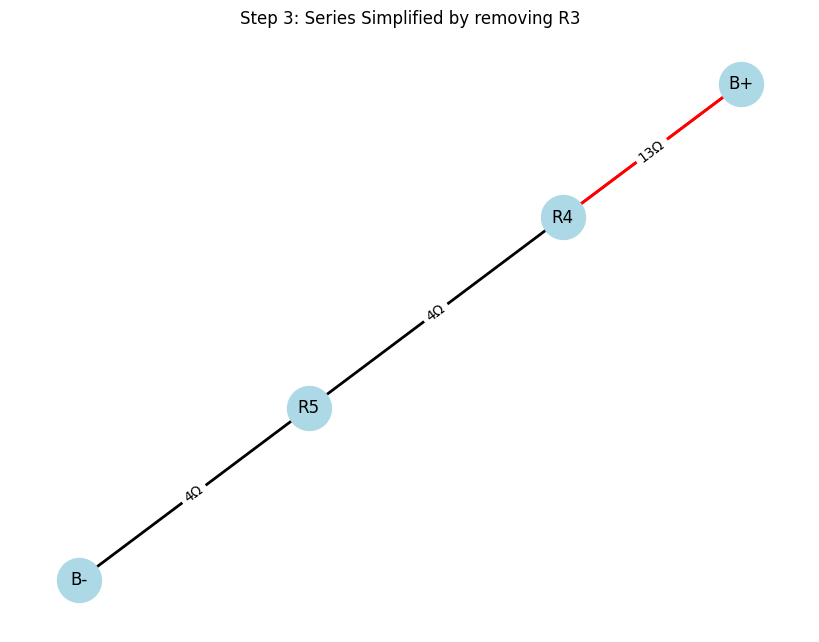

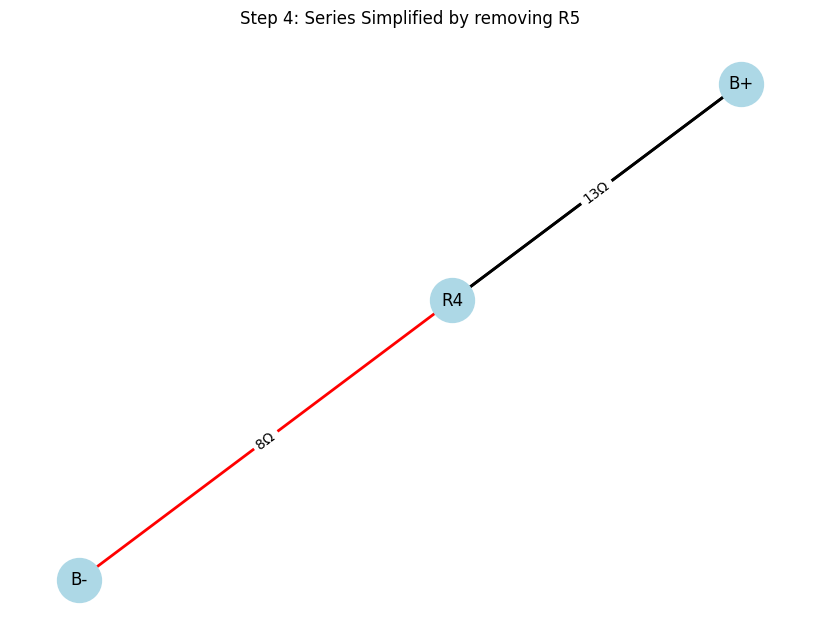

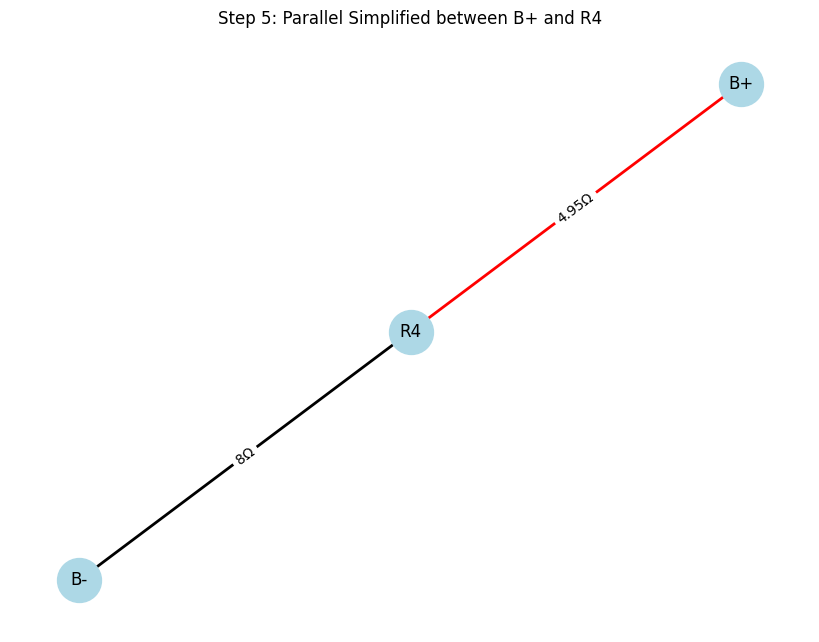

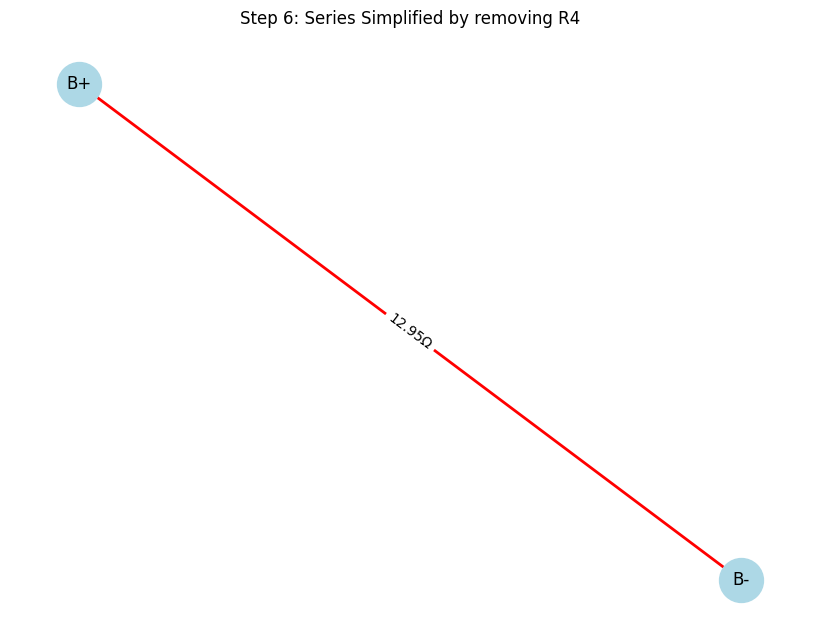

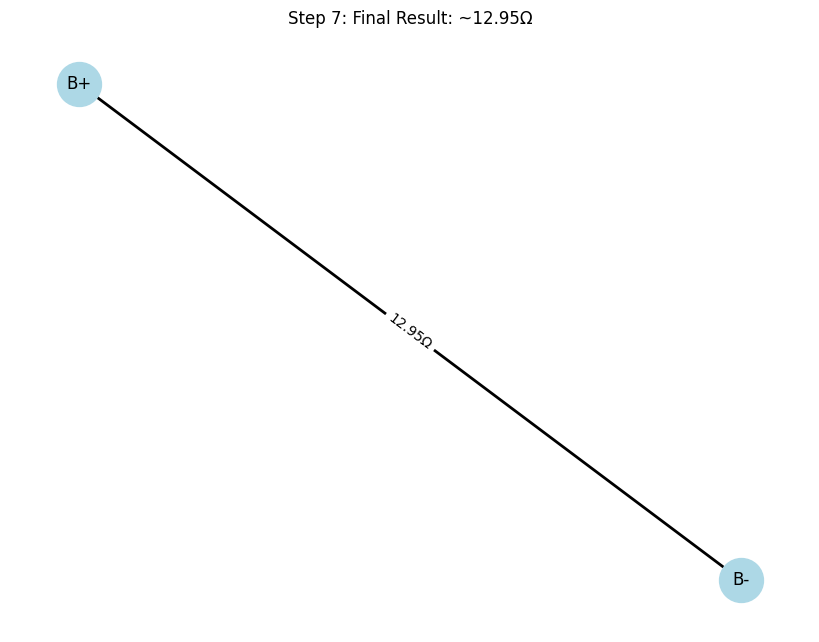

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.MultiGraph()

# Modified values based on screenshot circuit
G.add_edge("B+", "R1", resistance=3)
G.add_edge("B+", "R2", resistance=6)
G.add_edge("R2", "R3", resistance=2)
G.add_edge("R1", "R4", resistance=5)
G.add_edge("R3", "R4", resistance=5)
G.add_edge("R4", "R5", resistance=4)
G.add_edge("R5", "B-", resistance=4)

step_counter = 0

def draw_graph(G, step_desc, highlight_edges=None):
    global step_counter
    pos = nx.spring_layout(G, seed=42)
    edge_labels = {(u, v): f'{round(d["resistance"], 2)}Ω' for u, v, d in G.edges(data=True)}
    colors = []

    for u, v in G.edges():
        if highlight_edges is not None and ((u, v) in highlight_edges or (v, u) in highlight_edges):
            colors.append("red")
        else:
            colors.append("black")

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, edge_color=colors, width=2)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f"Step {step_counter}: {step_desc}")
    plt.show()
    step_counter += 1

draw_graph(G, "Initial Circuit")

def reduce_series(G):
    changed = True
    while changed:
        changed = False
        for node in list(G.nodes()):
            if node in ("B+", "B-") or G.degree(node) != 2:
                continue
            neighbors = list(G.neighbors(node))
            if len(neighbors) != 2:
                continue
            u, v = neighbors
            r1 = sum(d["resistance"] for _, d in G[u][node].items())
            r2 = sum(d["resistance"] for _, d in G[node][v].items())
            total_r = r1 + r2
            G.remove_node(node)
            G.add_edge(u, v, resistance=total_r)
            draw_graph(G, f"Series Simplified by removing {node}", highlight_edges=[(u, v)])
            changed = True
            break

def reduce_parallel(G):
    changed = True
    while changed:
        changed = False
        for u, v in list(G.edges()):
            edges = list(G.get_edge_data(u, v).items())
            if len(edges) <= 1:
                continue
            resistances = [d["resistance"] for _, d in edges]
            R_eq = round(1 / sum(1/r for r in resistances), 2)
            for key, _ in edges:
                G.remove_edge(u, v, key=key)
            G.add_edge(u, v, resistance=R_eq)
            draw_graph(G, f"Parallel Simplified between {u} and {v}", highlight_edges=[(u, v)])
            changed = True
            break

reduce_series(G)
reduce_parallel(G)
reduce_series(G)
reduce_parallel(G)

def calc_total_resistance(G, start, end):
    try:
        return round(nx.shortest_path_length(G, source=start, target=end, weight="resistance"), 2)
    except:
        return float("inf")

total_r = calc_total_resistance(G, "B+", "B-")
draw_graph(G, f"Final Result: ~{total_r}Ω")


### 🔗 Falstad Simulation Link

You can view the circuit in the Falstad Circuit Simulator here:

[Open in Falstad](https://tinyurl.com/2d6vmf9v)
